In [1]:
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
from umap import UMAP
import matplotlib.pyplot as plt
ENCODER = SentenceTransformer('all-mpnet-base-v2')

/Users/lp6/opt/anaconda3/envs/adml/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/lp6/opt/anaconda3/envs/adml/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/lp6/opt/anaconda3/envs/adml/lib/python3.9/site-packages/umap/dist

In [2]:
my_encoding = ENCODER.encode("The quick brown fox jumps over the lazy dog")
display(my_encoding.shape)
my_encoding

(768,)

array([-2.41035875e-02, -2.09894893e-03, -2.44234572e-03, -1.11331595e-02,
        1.96240544e-02,  3.31919305e-02, -1.19652543e-02,  2.41530929e-02,
       -3.53692286e-02, -3.82525437e-02,  1.74815990e-02,  5.15948497e-02,
       -3.72290448e-03,  5.87132648e-02,  3.90945598e-02, -8.38790834e-03,
        5.39238341e-02,  4.54315590e-03, -2.05428060e-02, -4.20075953e-02,
       -2.42288467e-02,  4.92548523e-03,  4.37885942e-03, -1.91046372e-02,
       -2.99328379e-02,  3.00455950e-02,  2.19108239e-02,  7.84096587e-03,
       -5.18376753e-03, -5.08811977e-03,  7.61109695e-04,  1.47869829e-02,
       -3.33857685e-02,  5.78062236e-02,  1.52562598e-06, -2.54524164e-02,
        1.32586993e-02,  3.22216153e-02,  1.13033339e-01,  6.41715992e-03,
       -1.98629610e-02, -2.77339034e-02, -7.13447928e-02, -2.79135127e-02,
       -3.10262181e-02, -3.90692381e-03, -1.41330922e-04,  4.40871231e-02,
       -5.75701632e-02,  4.23529595e-02,  6.70971023e-03, -2.29057632e-02,
        1.10517899e-02, -

In [3]:
def distance_texts(text1, text2):
    enc_1 = ENCODER.encode(text1)
    enc_2 = ENCODER.encode(text2)
    return cosine(enc_1, enc_2)

In [4]:
text_1 = "Do woodchucks actually chuck wood?"
text_2 = "Why should I switch to a plant-based diet?"
text_3 = "No. They 'chuck' on dirt as they build burrows."

display(distance_texts(text_2, text_3))
display(distance_texts(text_1, text_3))

0.9394979514181614

0.32727307081222534

/Users/lp6/opt/anaconda3/envs/adml/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


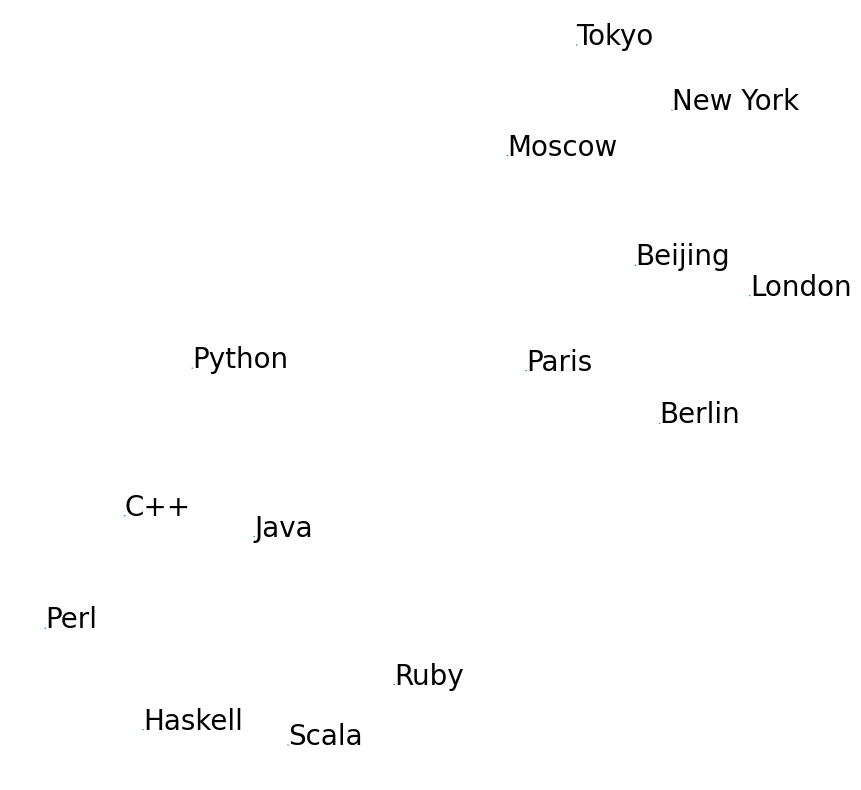

In [5]:
many_texts = [
    "London",
    "New York",
    "Paris",
    "Berlin",
    "Tokyo",
    "Moscow",
    "Beijing",
    "C++",
    "Python",
    "Java",
    "Perl",
    "Ruby",
    "Scala",
    "Haskell"
]

many_vectors = ENCODER.encode(many_texts)
many_2d  = UMAP().fit_transform(many_vectors)

plt.figure(figsize=(10,10), dpi=100)
plt.scatter(many_2d[:,0], many_2d[:,1], s=1, edgecolors='none')
for i, txt in enumerate(many_texts):
    plt.annotate(txt, (many_2d[i,0], many_2d[i,1]), fontsize=20)

plt.xticks([])
plt.yticks([])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.savefig("many.svg", format="svg")